<a href="https://colab.research.google.com/github/aditya87/pynb/blob/master/Test_Aditya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Streaming output truncated to the last 5000 lines.
Epoch 45001, loss 7.8687625665979075
Epoch 45002, loss 7.8685569120964045
Epoch 45003, loss 7.868351320411778
Epoch 45004, loss 7.868145791456244
Epoch 45005, loss 7.867940325142558
Epoch 45006, loss 7.867734921384023
Epoch 45007, loss 7.86752958009448
Epoch 45008, loss 7.867324301188295
Epoch 45009, loss 7.867119084580375
Epoch 45010, loss 7.866913930186149
Epoch 45011, loss 7.866708837921563
Epoch 45012, loss 7.866503807703095
Epoch 45013, loss 7.866298839447719
Epoch 45014, loss 7.866093933072935
Epoch 45015, loss 7.865889088496739
Epoch 45016, loss 7.865684305637646
Epoch 45017, loss 7.86547958441465
Epoch 45018, loss 7.8652749247472595
Epoch 45019, loss 7.865070326555459
Epoch 45020, loss 7.864865789759733
Epoch 45021, loss 7.864661314281054
Epoch 45022, loss 7.864456900040861
Epoch 45023, loss 7.864252546961082
Epoch 45024, loss 7.8640482549641195
Epoch 45025, loss 7.863844023972842
Epoch 45026, loss 7.863639853910586
Epoch 45027

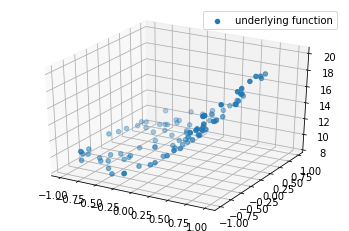

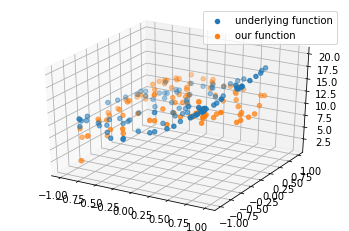

In [0]:
import numpy as np
from typing import Callable

# Let's use gradient descent to learn the weights and bias that minimizes the loss function.
# For this, we need the gradient of the loss function and the gradients of the linear function.

class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_pred - y_true) ** 2).mean()

  def backward(self):
    n = self.y_true.shape[0]
    self.gradient = 2. * (self.y_pred - self.y_true) / n
    # print('MSE backward', self.y_pred.shape, self.y_true.shape, self.gradient.shape)
    return self.gradient


class Perceptron:
  def __init__(self, input_dim: int, num_hidden: int = 1, activated_step=False):
    self.weights = np.random.randn(input_dim, num_hidden) - 0.5
    self.bias = np.random.randn(1) - 0.5
    self.activated_step = activated_step
  
  def __call__(self, x):
    self.x = x
    output = x @ self.weights + self.bias
    return np.vectorize(self.activate)(output)

  def activate(self, y):
    if self.activated_step is True:
      return 1 if y > 0 else -1
    else:
      return y

  # y = w*x + b
  # dy/dx = w
  # dy/dw = x
  # dy/db = 1

  def backward(self, gradient):
    self.weights_gradient = self.x.T @ gradient
    self.bias_gradient = gradient.sum()
    self.x_gradient = gradient @ self.weights.T
    return self.x_gradient

  def update(self, lr):
    self.weights = self.weights - lr * self.weights_gradient
    self.bias = self.bias - lr * self.bias_gradient

class Model:
  def __init__(self, input_dim, num_hidden):
    self.linear1 = Perceptron(input_dim, num_hidden, activated_step=True)
    self.linear2 = Perceptron(num_hidden, 1)
  
  def __call__(self, x):
    l1 = self.linear1(x)
    l2 = self.linear2(l1)
    return l2
  
  def backward(self, output_gradient):
    linear2_gradient = self.linear2.backward(output_gradient)
    linear1_gradient = self.linear1.backward(linear2_gradient)
    # import pdb; pdb.set_trace()
    return linear1_gradient

  def update(self, lr):
    self.linear2.update(lr)
    self.linear1.update(lr)

def plot_3d(x, y, y_pred=None):
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0], x[:, 1], y, label='underlying function')
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], y_pred, label='our function')
  plt.legend()

def fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  for epoch in range(num_epochs):
    y_pred = model(x)
    loss_value = loss(y_pred, y)
    print(f'Epoch {epoch}, loss {loss_value}')
    gradient_from_loss = loss.backward()
    model.backward(gradient_from_loss)
    model.update(lr)

d = 2
n = 100
x = np.random.uniform(-1, 1, (n, d))
weights_true = np.array([[5, 1],]).T
bias_true = np.array([10])

y_true = x**2 @ weights_true + x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

plot_3d(x, y_true)

loss = MSE()
model = Model(d, 100)

fit(x, y_true, model=model, loss=loss, lr=0.00002, num_epochs=50000)
plot_3d(x, y_true, model(x))